____
__Universite de Technologie de Troyes__<br/>
__Universidad Tecnologica Nacional Buenos Aires__<br/>
__Master OSS__<br/>
__Machine Learning & Pattern Recognition__<br/>
__Practice Sessions__<br/>
__Teacher: Martin Palazzo__<br/>
__source: https://github.com/martinepalazzo__<br/>
__Topic: dimensionality reduction__
____

In [1]:
# liver 1
# renal 0

### Import libraries

In [22]:
# basics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np

#sklearn
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#tensorflow keras
import tensorflow as tf
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

check if we are using GPU or CPU

In [23]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4774472150881779659
]


### Import Dataset

In [24]:
#from google.colab import files
#uploaded = files.upload()

In [25]:
#uploaded = files.upload()

In [7]:
data = pd.read_csv('./liver_kidney_expseq.csv', delimiter = ',', index_col=0 )
print('Shape:', data.shape)
data.head()

Shape: (812, 1027)


,0,?,A1BG,A2M,AADAC,ABP1,ACAA1,ACAA2,ACADVL,ACAT1,...,WDR74,WFDC2,XAGE1D,XBP1,YBX1,YWHAE,YWHAQ,YWHAZ,ZFP36,ZFP36L1
0,0.0,0.000320,1.205316e-06,0.000870,0.000000e+00,0.000136,0.000062,0.000311,0.000478,0.000138,...,0.000036,0.000008,0.000000e+00,0.000081,0.000351,0.000532,0.000179,0.000269,0.000443,0.000245
1,0.0,0.000258,1.041018e-06,0.001258,1.137360e-07,0.000106,0.000051,0.000164,0.000271,0.000136,...,0.000029,0.000048,0.000000e+00,0.000182,0.000555,0.000547,0.000277,0.000553,0.000328,0.000312
2,0.0,0.000264,5.559443e-07,0.000696,0.000000e+00,0.000631,0.000066,0.000534,0.000367,0.000244,...,0.000049,0.000046,0.000000e+00,0.000110,0.000379,0.000645,0.000187,0.000291,0.000113,0.000136
3,0.0,0.000288,1.599123e-06,0.000942,2.499093e-08,0.000087,0.000046,0.000284,0.000283,0.000083,...,0.000042,0.000047,5.798708e-07,0.000214,0.000293,0.000500,0.000242,0.000353,0.000165,0.000143
4,0.0,0.000247,2.226037e-06,0.001935,0.000000e+00,0.000249,0.000058,0.000382,0.000224,0.000090,...,0.000042,0.000065,0.000000e+00,0.000109,0.000387,0.000789,0.000261,0.000393,0.001079,0.000309


Perform Train-Test split

In [8]:
xtr00, xte0, ytr0, yte0 = train_test_split(data.iloc[:, 1:], data.iloc[:,0], test_size=0.3, random_state=42)
#ytr = ytr0.sort_values(by = [0])
ytr = ytr0
xtr0 = xtr00.reindex(ytr.index)
ytr = ytr.values
yte = yte0.values
ytr[ytr == 0] = -1
yte[yte == 0] = -1

MinMax Scaler between 0 and 1

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
xtr = pd.DataFrame(scaler.fit_transform(xtr0.values))
xte = pd.DataFrame(scaler.transform(xte0))

/home/tinto/anaconda3/envs/transomics_demo/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


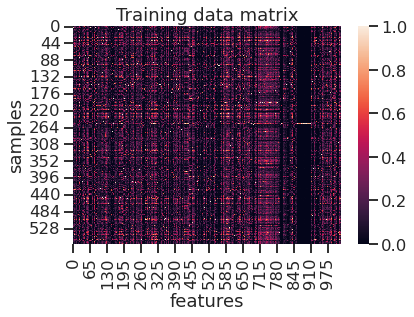

In [42]:
sns.heatmap(xtr)
plt.title('Training data matrix')
plt.xlabel('features')
plt.ylabel('samples')
plt.show()

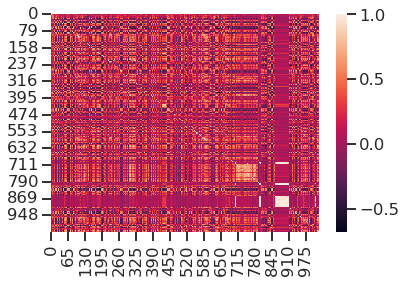

In [48]:
# correlation matrix in X
sns.heatmap(xtr.corr())
plt.show()

## Principal Component Analysis

Implement a PCA of the training data for visualization and exploration

In [11]:
# 
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(xtr)
xtr_pca = pca.transform(xtr)
xte_pca = pca.transform(xte)

In [12]:
# check the cumulative variance within the preserved components
np.sum(pca.explained_variance_ratio_)

0.6008211335436308

/home/tinto/anaconda3/envs/transomics_demo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


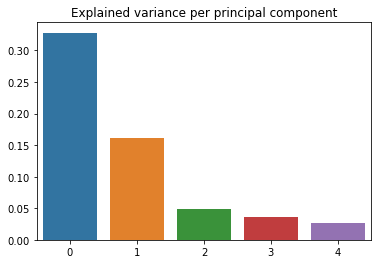

In [13]:
sns.barplot(np.arange(0,5),pca.explained_variance_ratio_)
plt.title('Explained variance per principal component')
plt.show()

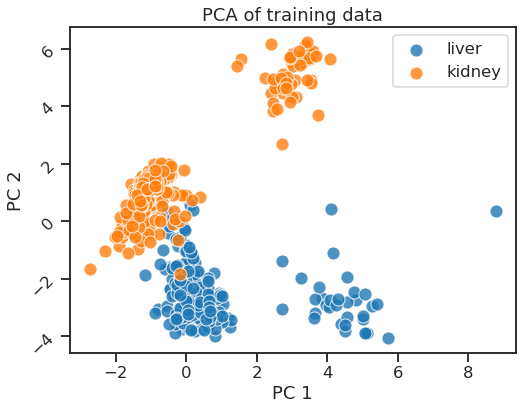

In [14]:
sns.set_style("white")
sns.set_context("talk")
sns.set_style("ticks")
ax1 = plt.subplot()
sns.scatterplot(x=xtr_pca[(ytr == 1).ravel(),1], y=xtr_pca[(ytr == 1).ravel(),0], alpha = 0.8, s= 170, legend='full', label = 'liver')
sns.scatterplot(x=xtr_pca[(ytr == -1).ravel(),1], y=xtr_pca[(ytr == -1).ravel(),0],alpha = 0.8, s= 170, legend='full', label = 'kidney')
ax1.legend(bbox_to_anchor=(-0.2, 1), loc=2, borderaxespad=0.,framealpha=1, frameon=True)
ax1.set_xlabel("PC 1")
ax1.set_ylabel("PC 2")
ax1.figure.set_size_inches( (8,6) )
ax1.set_title("PCA of training data")
plt.yticks(rotation=45) 
plt.legend()
plt.show()

# Kernel-PCA

In [15]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=5, kernel='rbf',gamma= 0.001)
xtr_kpca = kpca.fit_transform(xtr)
xte_kpca = kpca.transform(xte)

# Autoencoder
Here an autoencoder function is defined. The architecture can be changed if it is necessary.

In [34]:
def ae_arch_0(encoding_dim, epochs, bachs, l1_reg, l2_reg, lrate, xtr, xte): 
    earlstop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10,  mode='auto', baseline=None, restore_best_weights=False, verbose=1)
    rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', min_delta=0.001, patience=10, verbose=1, mode='auto')
    
    ################### Optimizer ###################
    optim = tf.keras.optimizers.Adam(lr=lrate)

    ################### MODEL ARCHITECTURE ###############
    
    # 00) INPUT
    inputdim = Input(shape=(xtr.shape[1],))
    
    # 01) DENSE LAYER
    encode_i = Dense(200, kernel_regularizer=regularizers.l2(l2_reg), activation = 'relu')(inputdim)
    
    # 02) BATCH NORM
    bn_i = BatchNormalization()(encode_i)
    
    # 03) DENSE LAYER
    encode_ii = Dense(100, activation = 'relu')(bn_i)

    latent = Dense(encoding_dim, kernel_regularizer = regularizers.l2(l2_reg), activation = 'relu')(encode_ii)

    # 04) DECODER
    decode_i = Dense(100, activation = 'relu')(latent)
    decode_ii = Dense(200,activation='relu')(latent)
    
    # 05) DECODER
    decode_iii = Dense(xtr.shape[1],activation='linear')(decode_ii)
    
    # 06) AUTOENCODER
    autoencoder = Model(inputdim, decode_iii)
    encoder = Model(inputdim, latent)
    
    #encoded_input5 = Input(shape=(encoding_dim5,))
    #decoder_layer5 = autoencoder5.layers[-3]
    #decoder5 = Model(x3, decoder_layer5(x3))

    autoencoder.summary()
    tf.keras.utils.plot_model(autoencoder, show_shapes=True)
    compression_factor = float(np.shape(xtr)[1]) / encoding_dim
    print("Compression factor: %s" % compression_factor)
    
    ################## COMPILE AND FIT MODEL #############
    autoencoder.compile(optimizer=optim, loss='mse')
    autoencoder.fit(xtr, xtr,epochs=epochs, batch_size=bachs,  shuffle=True,  validation_data=(xte, xte), callbacks = [earlstop, rlrop])
    
    histval = autoencoder.history.history['val_loss']
    histtra = autoencoder.history.history['loss']
    
    return encoder, histtra, histval

Train an autoencoder model. Store the encoder function and the training loss scores.

In [35]:
encoder_val, hist_tra, hist_val = ae_arch_0(50,50,32,0.001, 0.003, 0.0001, xtr, xte)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1026)]            0         
_________________________________________________________________
dense_6 (Dense)              (None, 200)               205400    
_________________________________________________________________
batch_normalization_1 (Batch (None, 200)               800       
_________________________________________________________________
dense_7 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_8 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_10 (Dense)             (None, 200)               10200     
_________________________________________________________________
dense_11 (Dense)             (None, 1026)              2062

2022-12-16 13:08:39.142445: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-12-16 13:08:39.162632: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2299965000 Hz


18/18 [==============================] - 1s 29ms/step - loss: 1.2462 - val_loss: 1.3102
Epoch 2/50
18/18 [==============================] - 0s 8ms/step - loss: 1.1610 - val_loss: 1.2380
Epoch 3/50
18/18 [==============================] - 0s 8ms/step - loss: 1.0855 - val_loss: 1.1678
Epoch 4/50
18/18 [==============================] - 0s 8ms/step - loss: 1.0120 - val_loss: 1.1010
Epoch 5/50
18/18 [==============================] - 0s 9ms/step - loss: 0.9448 - val_loss: 1.0387
Epoch 6/50
18/18 [==============================] - 0s 8ms/step - loss: 0.8809 - val_loss: 0.9808
Epoch 7/50
18/18 [==============================] - 0s 8ms/step - loss: 0.8229 - val_loss: 0.9274
Epoch 8/50
18/18 [==============================] - 0s 7ms/step - loss: 0.7690 - val_loss: 0.8761
Epoch 9/50
18/18 [==============================] - 0s 9ms/step - loss: 0.7186 - val_loss: 0.8293
Epoch 10/50
18/18 [==============================] - 0s 11ms/step - loss: 0.6718 - val_loss: 0.7852
Epoch 11/50
18/18 [=========

Plot the training and validation Loss.

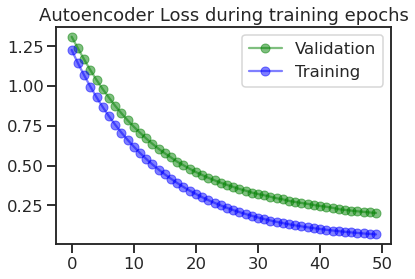

In [36]:
plt.plot(hist_val, c = 'g', label = "Validation", marker = 'o', alpha = 0.5)
plt.plot(hist_tra, c = 'b', label = "Training", marker = 'o', alpha = 0.5)
plt.title("Autoencoder Loss during training epochs")
plt.legend()
plt.show()

Encode training and validation samples by using the Encoder function to obtain its projection on the latent space.

In [37]:
xlat_tr = encoder_val.predict(xtr)
xlat_te = encoder_val.predict(xte)

Visualize the training samples by class (1 or -1) in the latent space.

# Visualize 

In [38]:
xtr_ae_tsne = TSNE(n_components=2).fit_transform(xlat_tr)
xtr_kpca_tsne = TSNE(n_components=2).fit_transform(xtr_kpca)
xtr_pca_tsne = TSNE(n_components=2).fit_transform(xtr_pca)
#xtr_lasso_tsne = TSNE(n_components=2).fit_transform(xtr_lasso)

/home/tinto/anaconda3/envs/transomics_demo/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/tinto/anaconda3/envs/transomics_demo/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/tinto/anaconda3/envs/transomics_demo/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/tinto/anaconda3/envs/transomics_demo/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/tinto/anaconda3/envs/transomics_demo/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE w

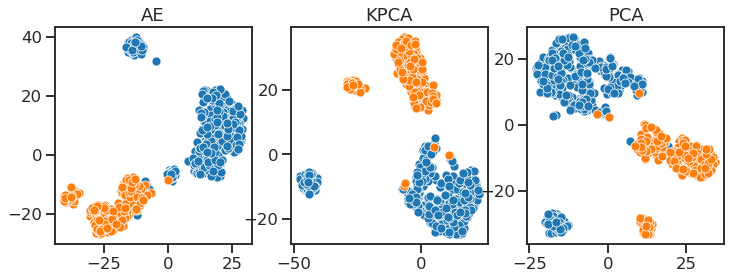

In [39]:
f, ax = plt.subplots(1,3)
f.set_size_inches(12,4)
sns.scatterplot(x = xtr_ae_tsne[(ytr).ravel() == -1,0], y = xtr_ae_tsne[ytr.ravel() == -1,1], ax= ax[0])
sns.scatterplot(x = xtr_ae_tsne[ytr.ravel() == 1,0], y = xtr_ae_tsne[ytr.ravel() == 1,1], ax= ax[0])
ax[0].set_title("AE")
sns.scatterplot(x = xtr_kpca_tsne[(ytr).ravel() == -1,0], y = xtr_kpca_tsne[ytr.ravel() == -1,1], ax= ax[1])
sns.scatterplot(x = xtr_kpca_tsne[ytr.ravel() == 1,0], y = xtr_kpca_tsne[ytr.ravel() == 1,1], ax= ax[1])
ax[1].set_title("KPCA")
sns.scatterplot(x = xtr_pca_tsne[(ytr).ravel() == -1,0], y = xtr_pca_tsne[ytr.ravel() == -1,1], ax= ax[2])
sns.scatterplot(x = xtr_pca_tsne[ytr.ravel() == 1,0], y = xtr_pca_tsne[ytr.ravel() == 1,1], ax= ax[2])
ax[2].set_title("PCA")
#sns.scatterplot(x = xtr_lasso_tsne[(ytr).ravel() == -1,0], y = xtr_lasso_tsne[ytr.ravel() == -1,1], ax= ax[3])
#sns.scatterplot(x = xtr_lasso_tsne[ytr.ravel() == 1,0], y = xtr_lasso_tsne[ytr.ravel() == 1,1], ax= ax[3])
#ax[3].set_title("Lasso")1
plt.show()

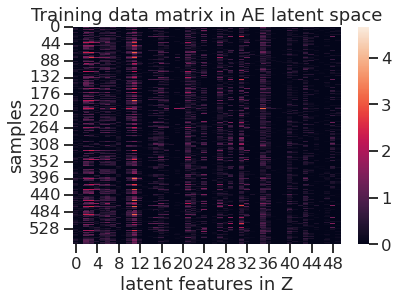

In [45]:
sns.heatmap(xlat_tr)
plt.title('Training data matrix in AE latent space')
plt.xlabel('latent features in Z')
plt.ylabel('samples')
plt.show()

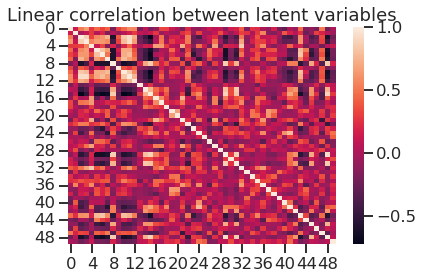

In [53]:
# correlation matrix in Z
sns.heatmap(np.corrcoef(xlat_tr.T))
plt.title('Linear correlation between latent variables')
plt.show()